


[1. IMPORTING LIBRARIES](#1)
    
[2. LOADING DATA](#2)    

[3. DATA VISUALIZATION](#3)        

[4. MODEL BUILDING](#4) 

[5. CONCLUSION](#5) 


<a id="1"></a>
# **<span style="color:#6B614B;">IMPORTING LIBRARIES</span>**

In [2]:
# Importing all the libraries 
import seaborn as sns
# import matplot
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
import tensorflow as tf
import numpy as np
from configs import paths, dataset_gen


In [3]:
img_width, img_height = 150,150
nb_train_sample =1000
nb_validation_samples =100

epochs = 50
batch_size = 20


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)



train_generator= train_datagen.flow_from_directory(paths.train_data_dir, target_size =(150,150),batch_size=batch_size, class_mode="binary" )

validation_generator = validation_datagen.flow_from_directory(paths.validation_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 
test_generator = test_datagen.flow_from_directory(paths.test_data_dir, target_size = (150,150),batch_size=batch_size, class_mode="binary")
 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**<span style="color:#6B614B;">The count of classes</span>**

There is a data imbalance. The number of Pneumonia CXR images are more than the number of normal CXR images.  

<a id="4"></a>
# **<span style="color:#6B614B;">MODEL BUILDING</span>**


**Convolutional neural network**

Following steps are involved in the model building

* Initialising the Convnet
* Defining by adding layers
* Compiling the Convnet
* Train the Convnet

In [4]:
if K.image_data_format()=="channels_first":
    input_shape =(3,img_width, img_height)
else:
    input_shape =(img_width, img_height,3)

model = Sequential()
model.add(Conv2D(32,(3,3), input_shape=input_shape))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [5]:
model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
weight_for_0 = (1 / proportion[0])*(proportion[1]+proportion[0])/2.0 
weight_for_1 = (1 / proportion[1])*(proportion[1]+proportion[0])/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

# class_weight = {0: 1.95, 1: 0.67}

In [ ]:
history = model.fit(train_generator, steps_per_epoch=nb_train_sample//batch_size, epochs=epochs,validation_data=validation_generator, validation_steps=nb_validation_samples//batch_size)

Text(0.5, 1.0, 'Accuracy Evolution')

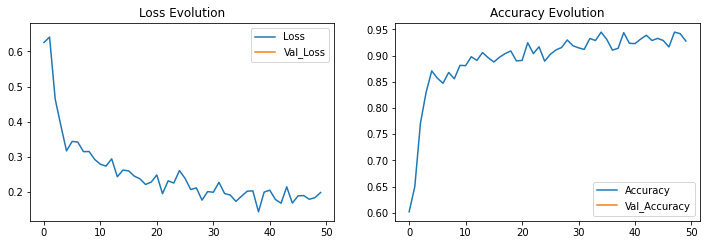

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [18]:
history.history['val_accuracy']

[0.75]

Text(0.5, 1.0, 'Accuracy Evolution')

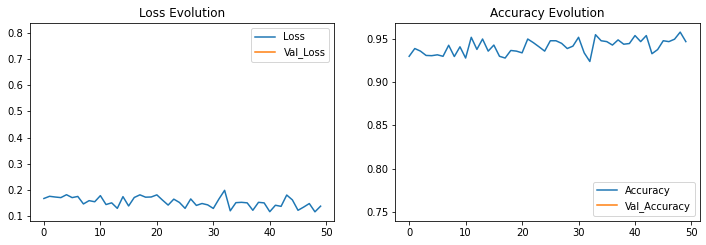

In [15]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
model.save("model3")

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


<a id="5"></a>
# **<span style="color:#6B614B;">CONCLUSION</span>** 


* Testing on the test set
* Evaluating Test Accuracy

In [19]:
test_accuracy = model.evaluate(test_generator)
print('The accuracy on test set :',test_accuracy[1]*100 )

32/32 [==============================] - 7s 233ms/step - loss: 0.2754 - accuracy: 0.9263
The accuracy on test set : 92.62820482254028


In [ ]:
test_accuracy = model.evaluate(test_generator)

32/32 [==============================] - 6s 187ms/step - loss: 0.4117 - accuracy: 0.9022


In [ ]:
print('The accuracy on test set :',test_accuracy[1]*100 )

The accuracy on test set : 90.22436141967773


In [ ]:
print('The accuracy on test set :',test_accuracy[1]*100 )

The accuracy on test set : 91.82692170143127
